<a href="https://colab.research.google.com/github/SofiaShvedova/Programming-for-analysts/blob/main/lab%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание**

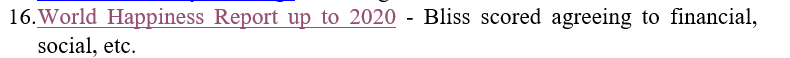

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2020.csv to 2020.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('2020.csv')

In [6]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [22]:
df1 = df.round({'Ladder score': 0, 'Standard error of ladder score': 0, 'upperwhisker': 0, 'lowerwhisker': 0, 'Social support': 0, 'Explained by: Social support': 0, 'Logged GDP per capita': 0})

### **Box plots**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


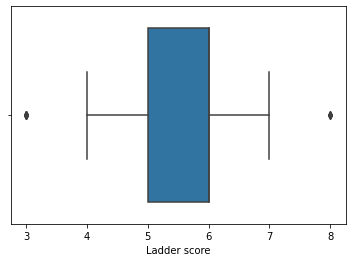

In [23]:
sns.boxplot(df1["Ladder score"])

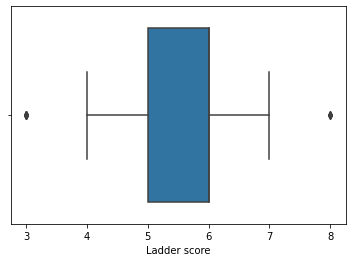

In [26]:
sns.boxplot(x="Ladder score", data=df1)

### **Вывод: Распределение Ladder score числовых переменных, как мы видим в пределах 5-6**

### **Violin plot**

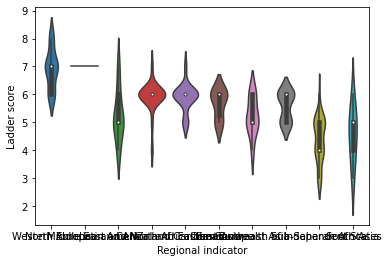

In [29]:
sns.violinplot(x='Regional indicator', y="Ladder score", data=df1)

**Вывод: распределение показателя Ladder Score по разным регионам, выше всего в Western Europe**

### **Count plots**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


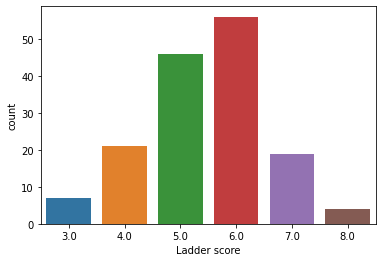

In [30]:
sns.countplot(df1["Ladder score"])

**Вывод: распределение показателя Ladder Score, больше всего стран с 6.0**

### **Heatmap**

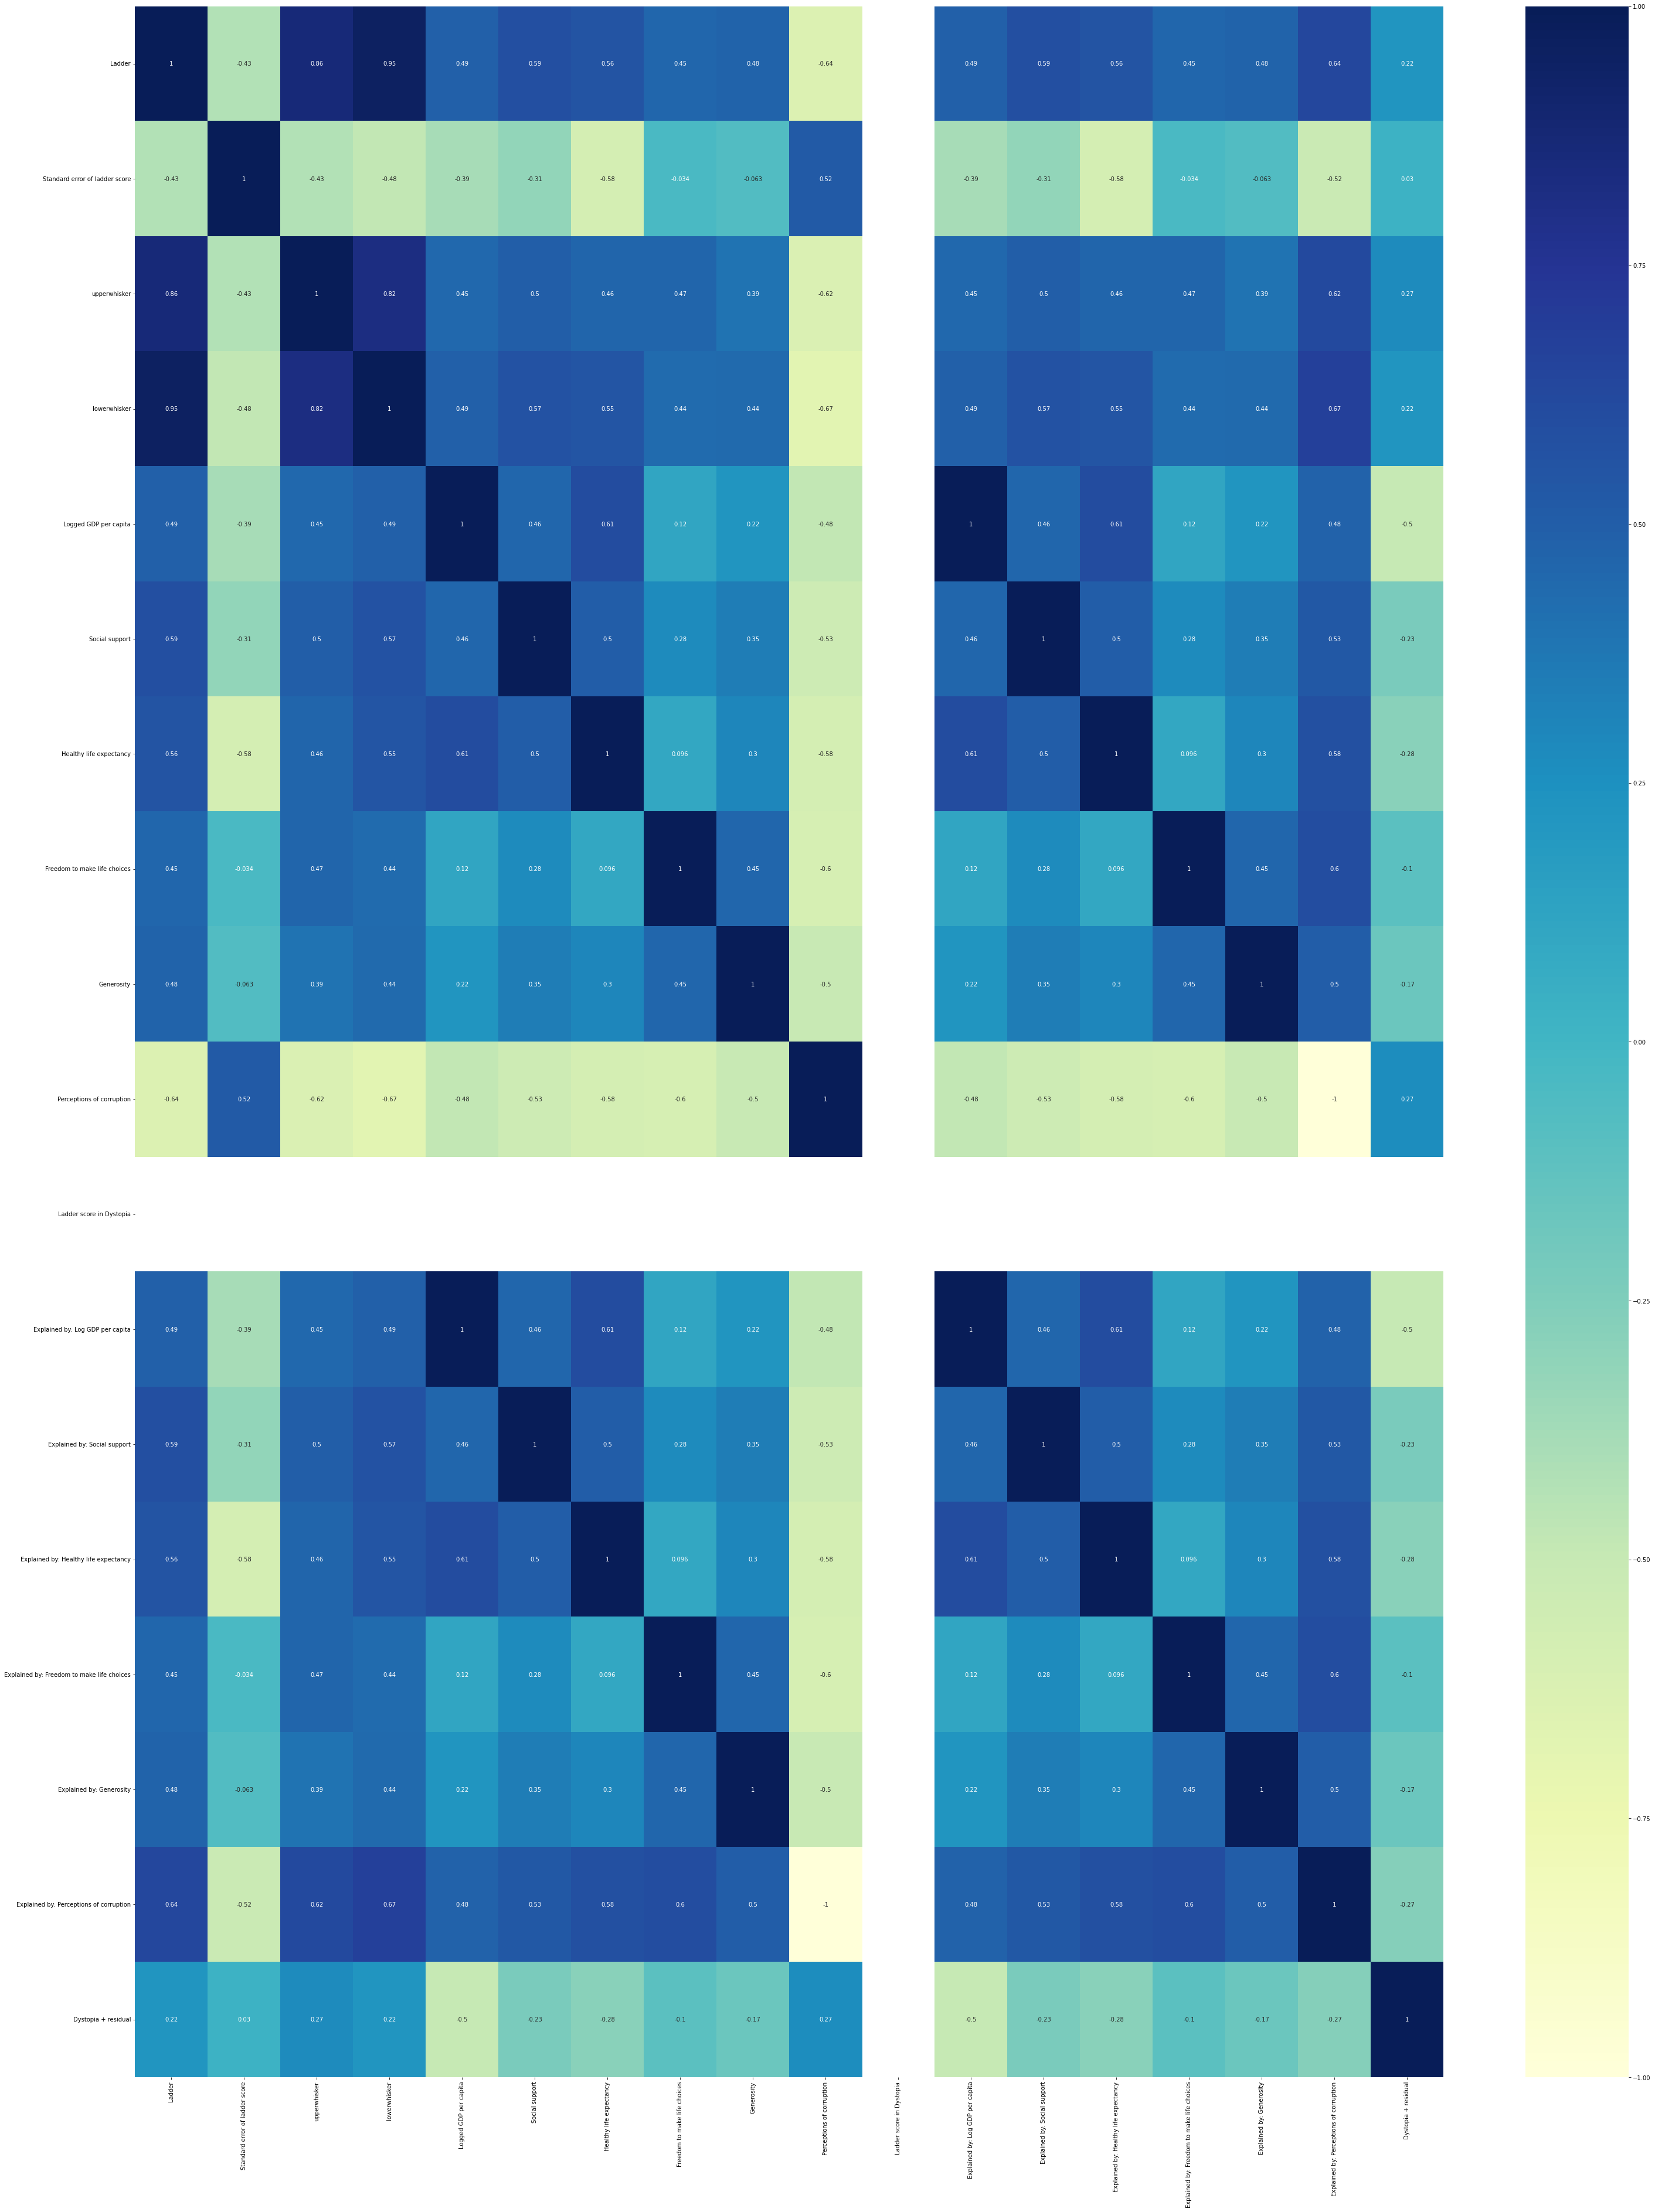

In [ ]:
df2 = df1.head(50)
plt.figure(figsize=(50, 65))
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu")

### **Вывод: наглядная иллюстрация всех показателей в графике**

### **Facet grid**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


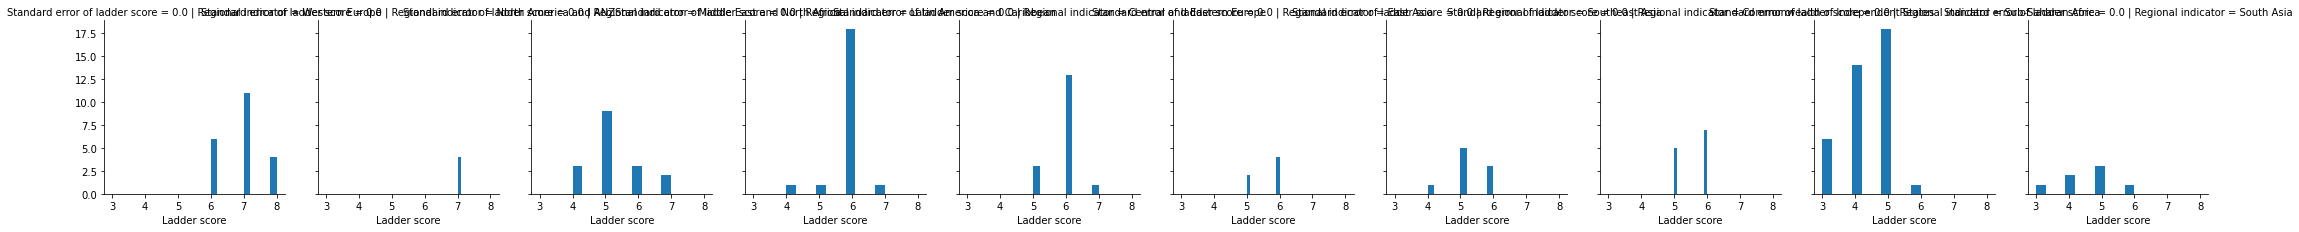

In [31]:
g = sns.FacetGrid(df1, col='Regional indicator', row='Standard error of ladder score')
g.map(plt.hist, 'Ladder score')

### **Вывод: показ графиков по регионам, какой показатель Ladder score у каждого, учитывая отклонения Standard error of ladder score**

## **Regplot**

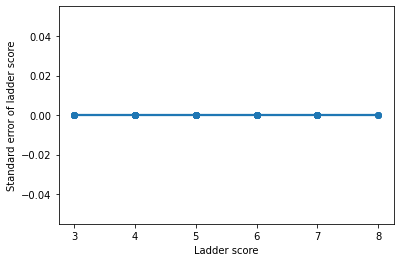

In [40]:
sns.regplot(x='Ladder score', y="Standard error of ladder score",data=df1)

### **Вывод: показ отклонений Ladder score, как мы видим они минимальные**

## **lmplot**

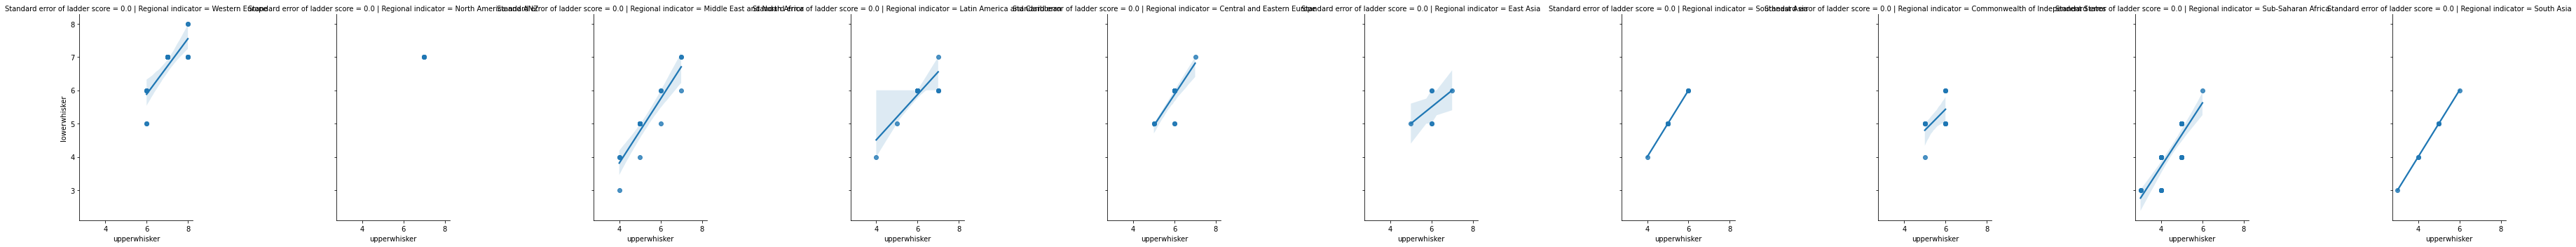

In [37]:
sns.lmplot(x='upperwhisker', y='lowerwhisker', row='Standard error of ladder score', data=df1, col='Regional indicator')

### **Вывод: графики показывают наглядно иллюстрацию распределения отклонения от Ladder Score, учитывая upperwhisker и lowerwhisker**

### **Swarm plot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


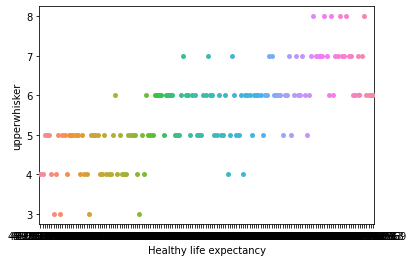

In [51]:
sns.swarmplot(x='Healthy life expectancy', y='upperwhisker', data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


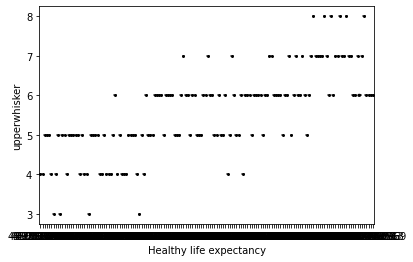

In [52]:
sns.violinplot(x='Healthy life expectancy', y='upperwhisker', data=df1, palette='rainbow')
sns.swarmplot(x='Healthy life expectancy', y='upperwhisker', data=df1, color='black', size=3)

### **Pair plot**

In [ ]:
sns.pairplot(df1, hue='Regional indicator', palette='Set1')

### **Joint plot**

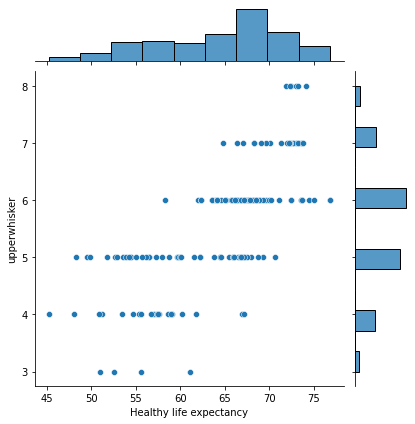

In [54]:
sns.jointplot(x='Healthy life expectancy', y='upperwhisker', data=df1)